## **Studi Kasus** :
- Menganalisis faktor - faktor yang membuat pelanggan berheti menggunakan produk atau layanan
- Mengidentifikasi ciri - ciri pelanggan yang akan berhenti menggunakan produk atau layanan.
- Memprediksi pelanggan beresiko berhenti menggunakan produk.
- Memberikan solusi untuk mengurangi jumlah pelanggan yang beresiko.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(columns=['CustomerID'], inplace=True)

In [4]:
df_copy = df.copy()

In [5]:
num_cols = df_copy.select_dtypes(include=np.number)
cat_cols = df_copy.select_dtypes(include='object')

# **Exploratory Data Analysis**

In [6]:
df_copy.shape

(7043, 20)

Dataset ini memiliki **7043 baris**, **20 fitur**, dan **1 kelas**

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Kolom - kolom pada dataset ini bertipe data :
- **Kolom Float** berjumlah 1
- **Kolom Integer** berjumlah 2
- **Kolom Object** berjumlah 18

In [8]:
round(num_cols.describe(), 2)

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [9]:
cat_cols.describe()

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Kita bisa mendapatkan informasi tentang :
- **Jumlah nilai unik**
- **Modus**
- **Mean**
- **Standar deviasi**
- **Q1**
- **Q3**

### **Range**

In [10]:
for col in num_cols.columns:
    range_val = num_cols[col].max() - num_cols[col].min()
    print(f'Range Kolom {col} : {range_val}')

Range Kolom SeniorCitizen : 1
Range Kolom Tenure : 72
Range Kolom MonthlyCharges : 100.5


### **Varian**

In [11]:
for col in num_cols.columns:
    variance = num_cols[col].var()
    print(f'Varian Kolom {col} : {variance}')

Varian Kolom SeniorCitizen : 0.13587451579039184
Varian Kolom Tenure : 603.1681081237368
Varian Kolom MonthlyCharges : 905.4109343405098


### **Interquartile Range**

In [12]:
for col in num_cols.columns:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    print(f'IQR Kolom {col} : {iqr}')

IQR Kolom SeniorCitizen : 0.0
IQR Kolom Tenure : 46.0
IQR Kolom MonthlyCharges : 54.349999999999994


## **Distribusi Data**

### **Distribusi Kolom Numerik**

Kita bisa tahu **distribusi data** dan **outlier** pada data numerik

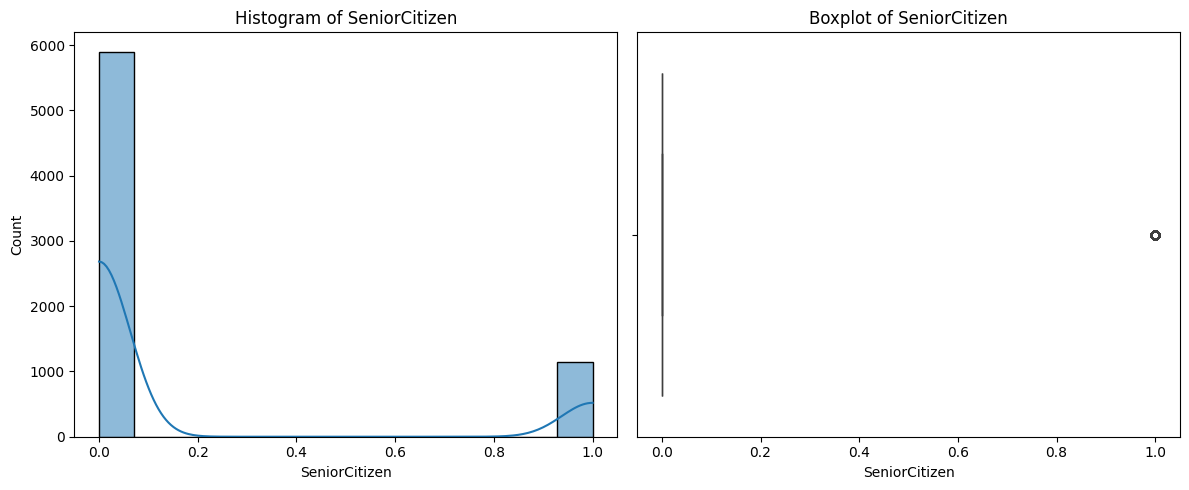

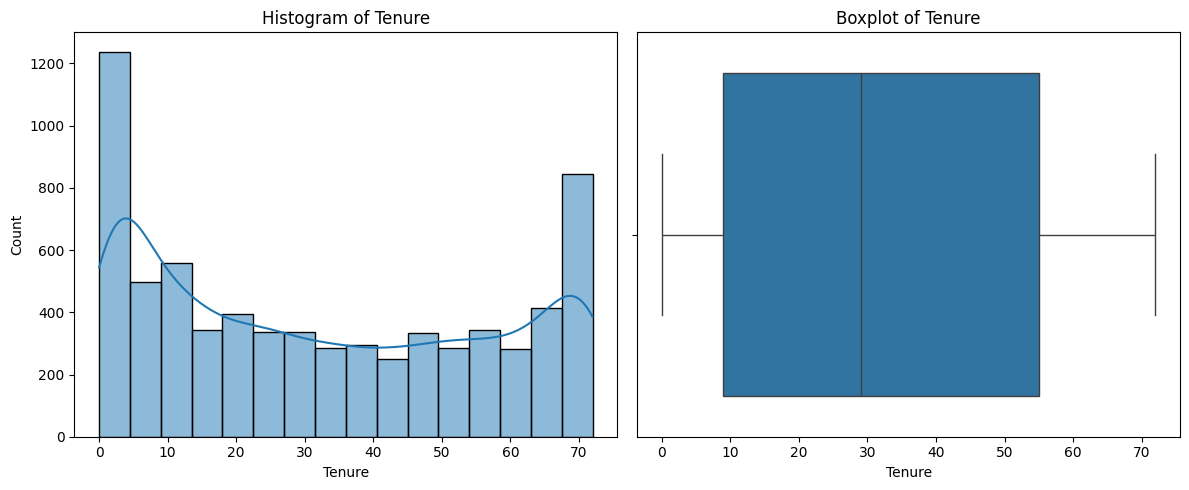

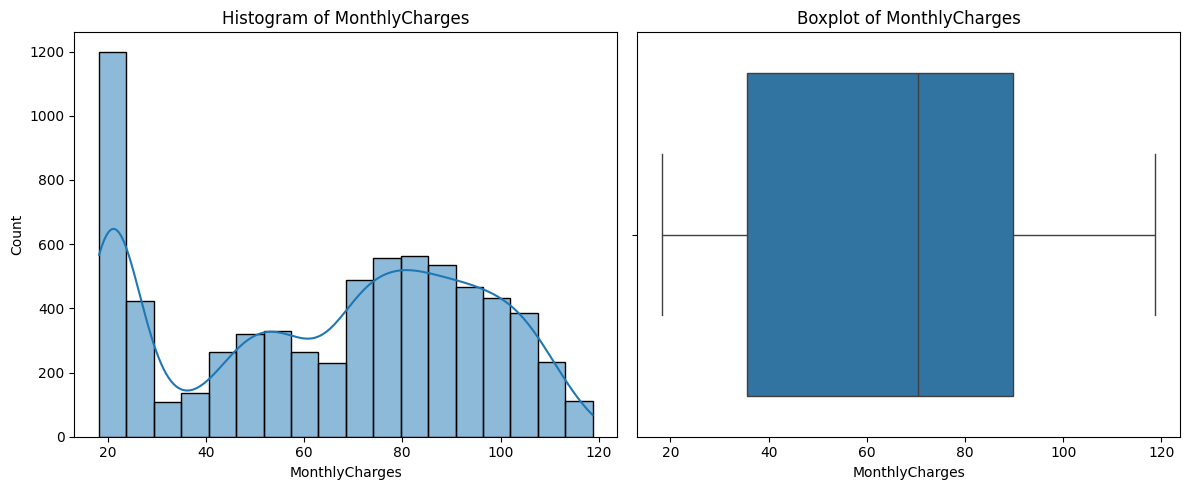

In [13]:
for i in num_cols.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram (Distribution Plot)
    sns.histplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')
    
    # Boxplot
    sns.boxplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

### **Distribusi Kolom Kategorikal**

Kita bisa tahu **distribusi nilai unik** pada kolom kategorikal

In [14]:
colors = ['orange', 'blue', 'green', 'red', 'pink', 'cyan', 'purple']

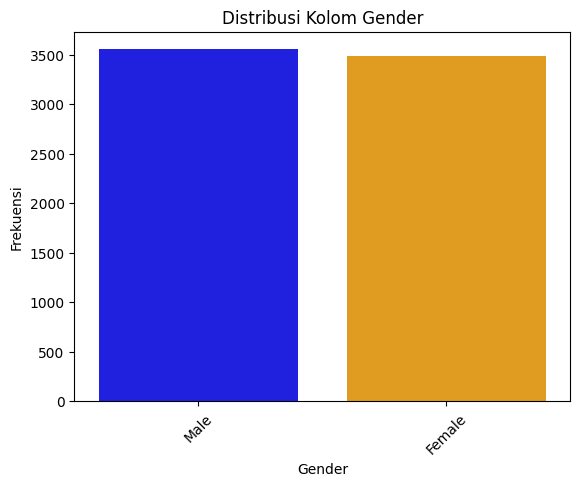

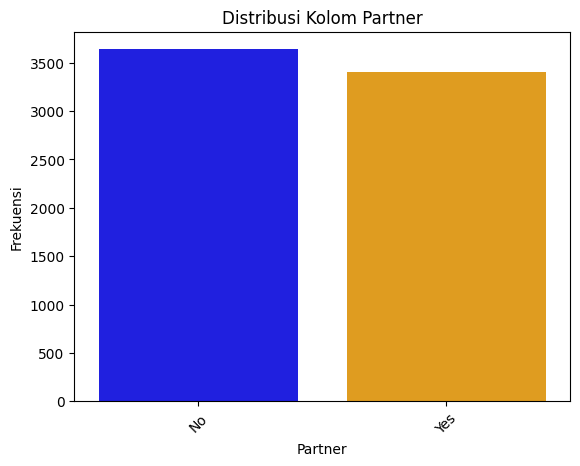

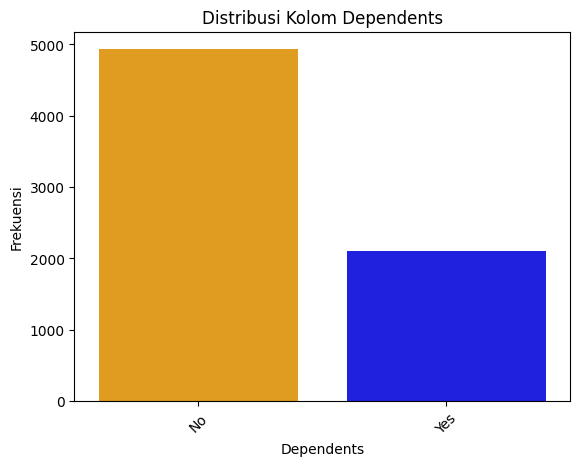

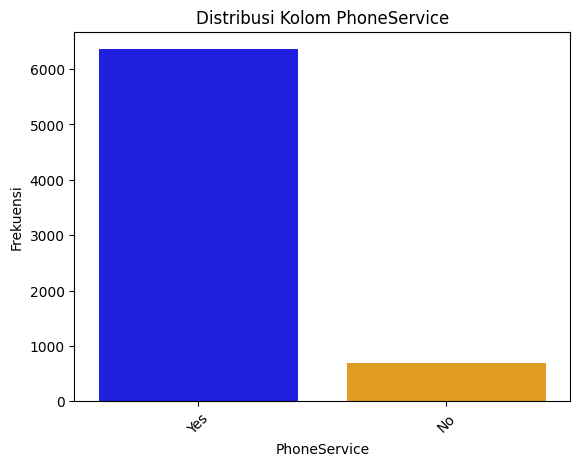

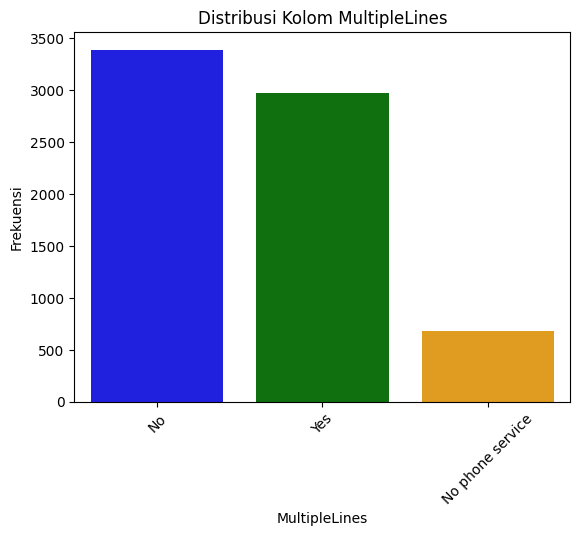

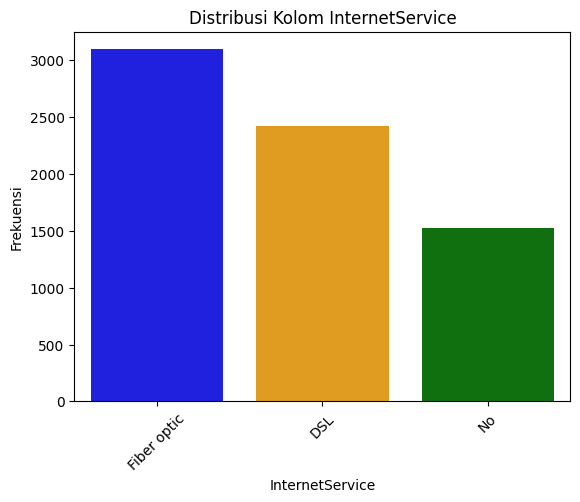

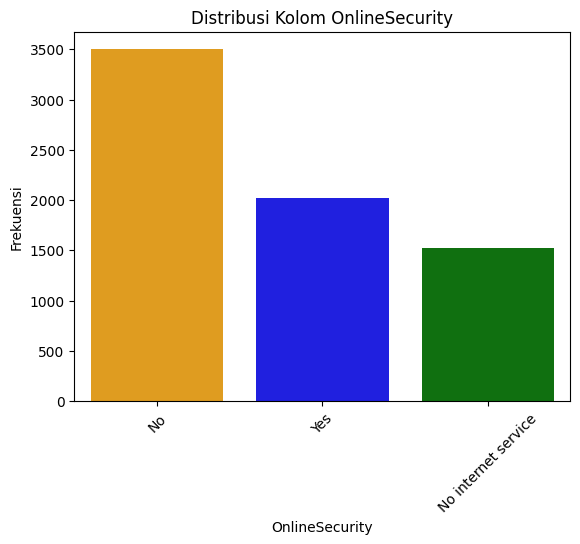

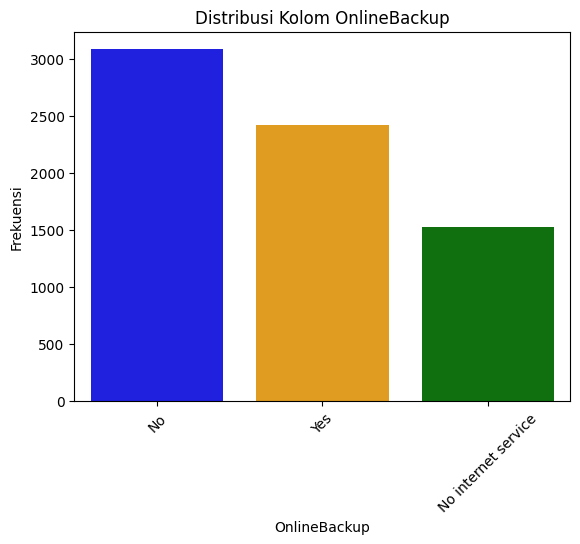

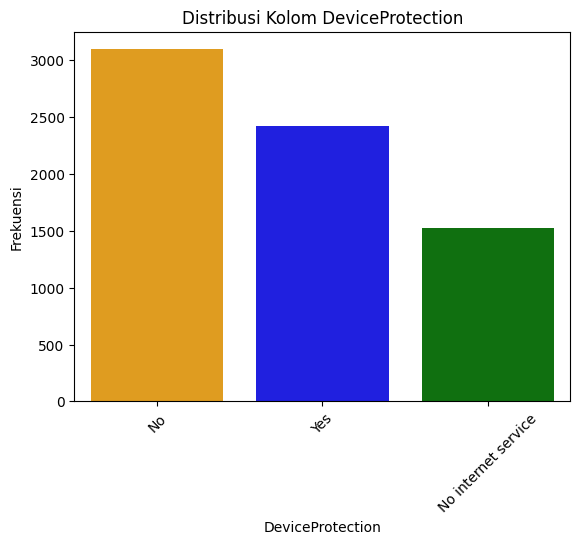

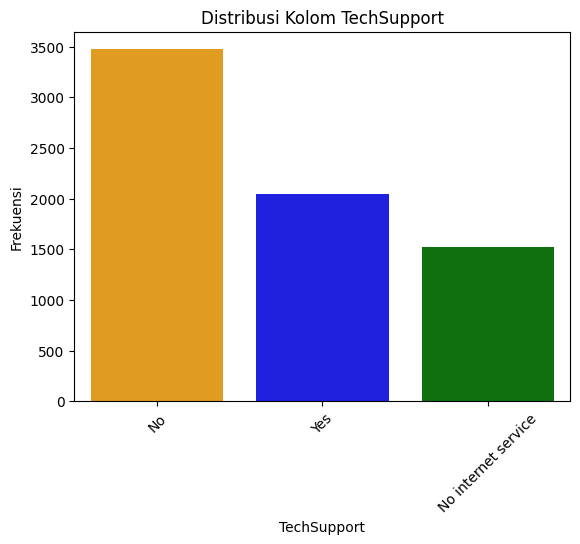

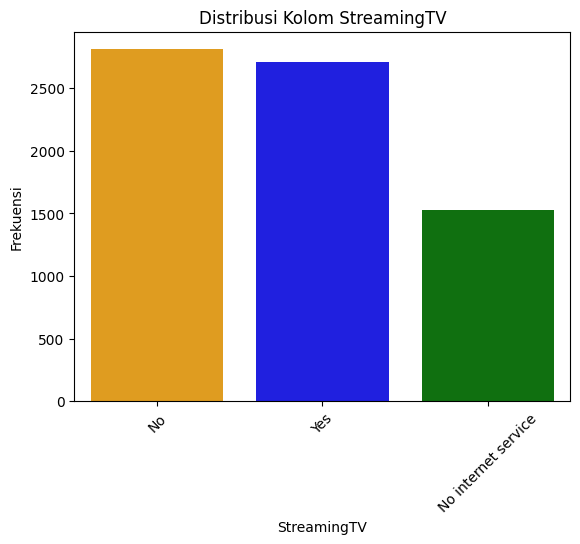

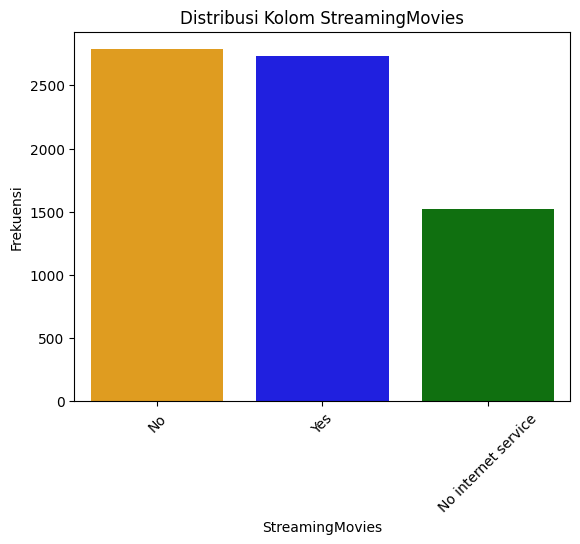

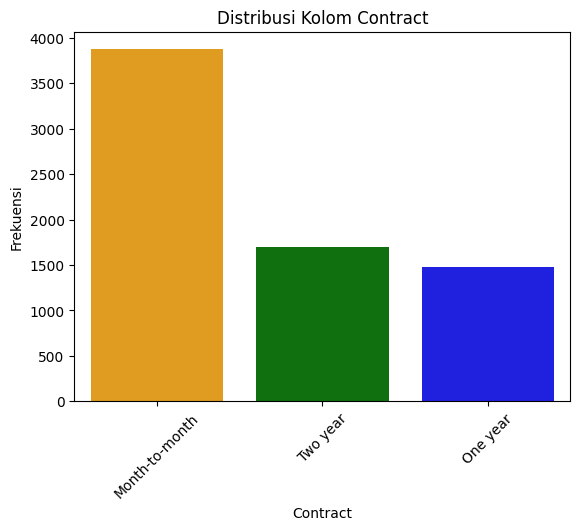

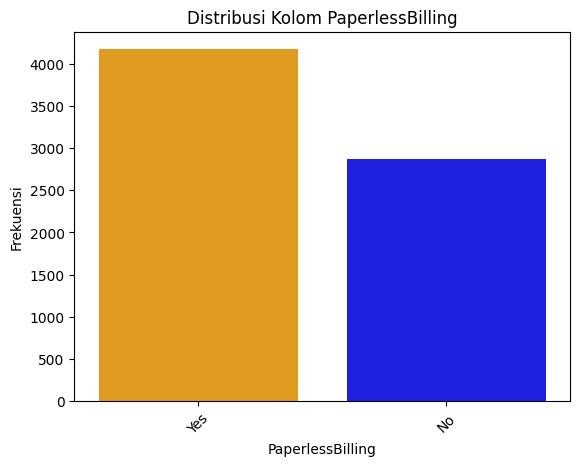

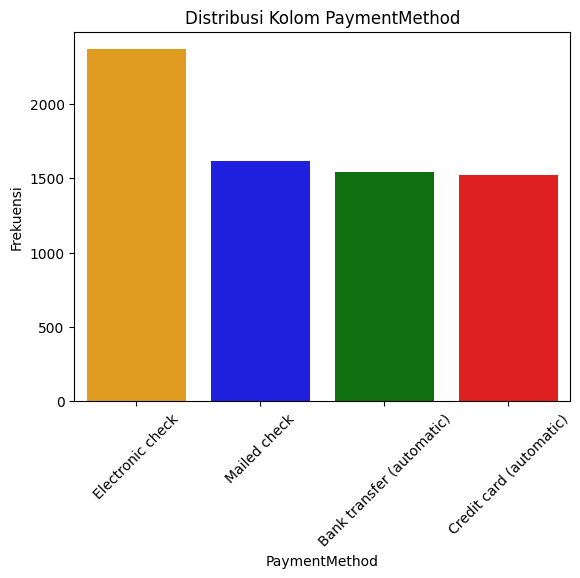

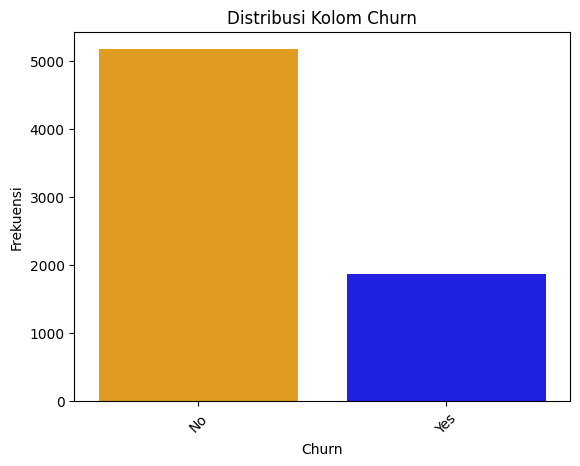

In [15]:
for col in cat_cols.columns:
    if col != 'TotalCharges':
        unique_values = cat_cols[col].nunique()
        palette = colors[:unique_values]
        sns.countplot(data=cat_cols, x=col, hue=col, order=cat_cols[col].value_counts().index, palette=palette, legend=False)  
        plt.title(f'Distribusi Kolom {col}')
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

Kita bisa mendapatkan **insight** dari hubungan antara fitur dan kelas

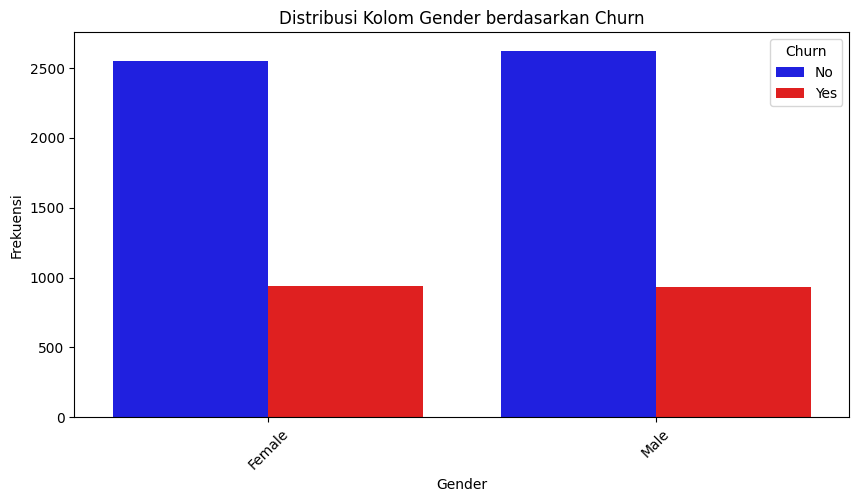

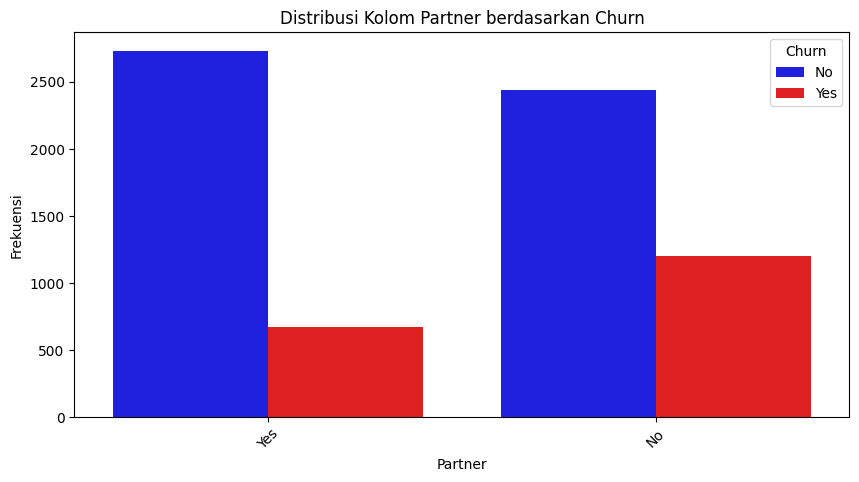

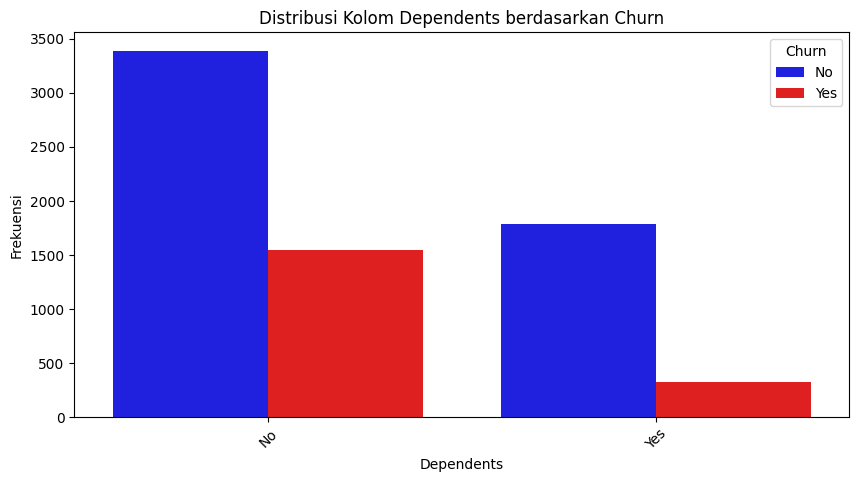

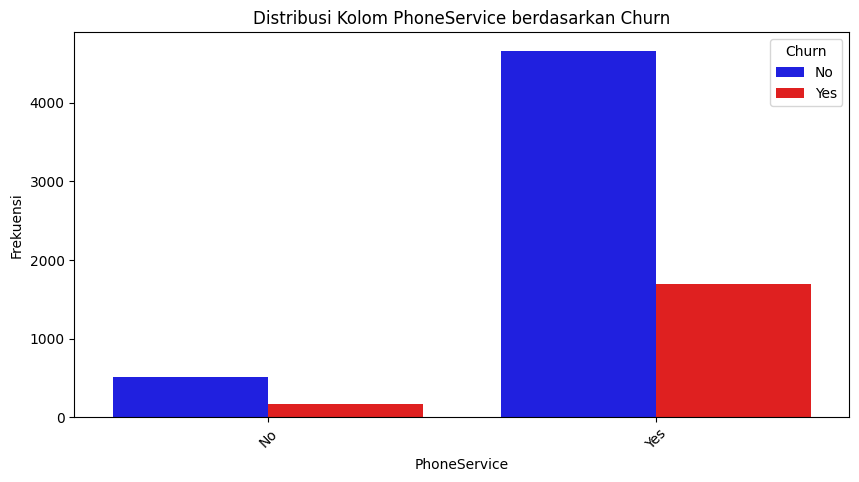

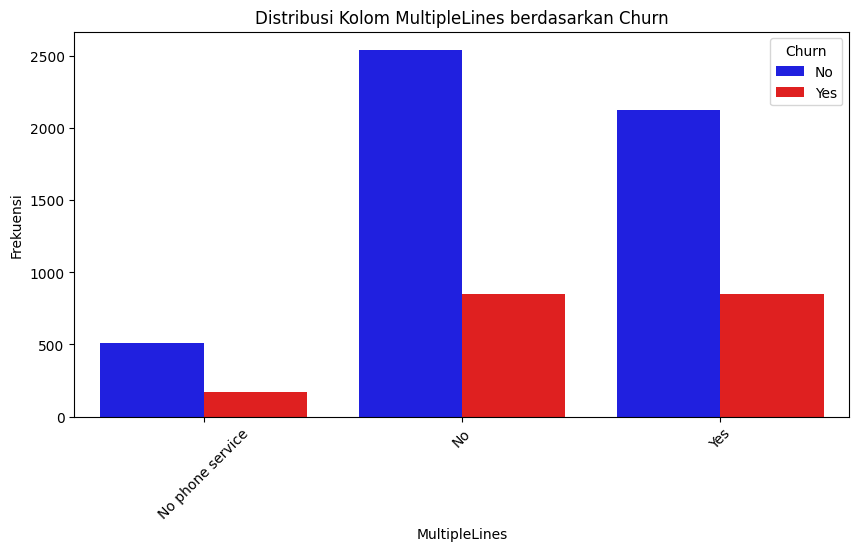

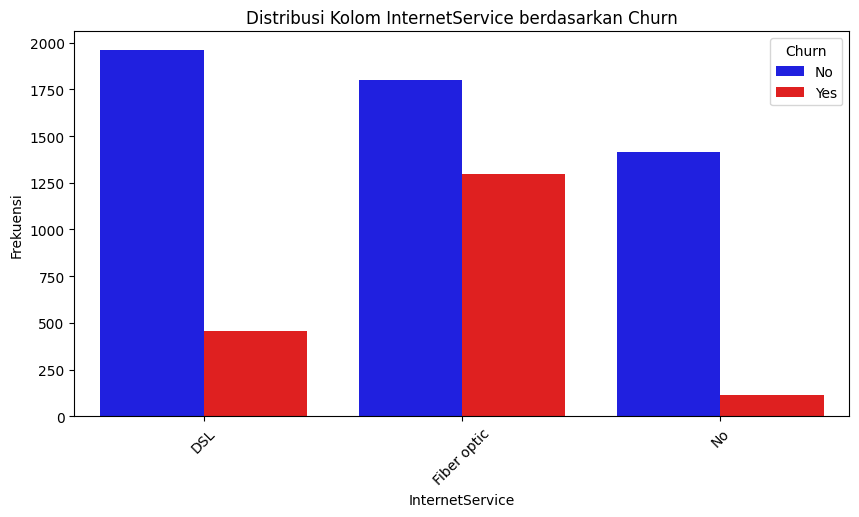

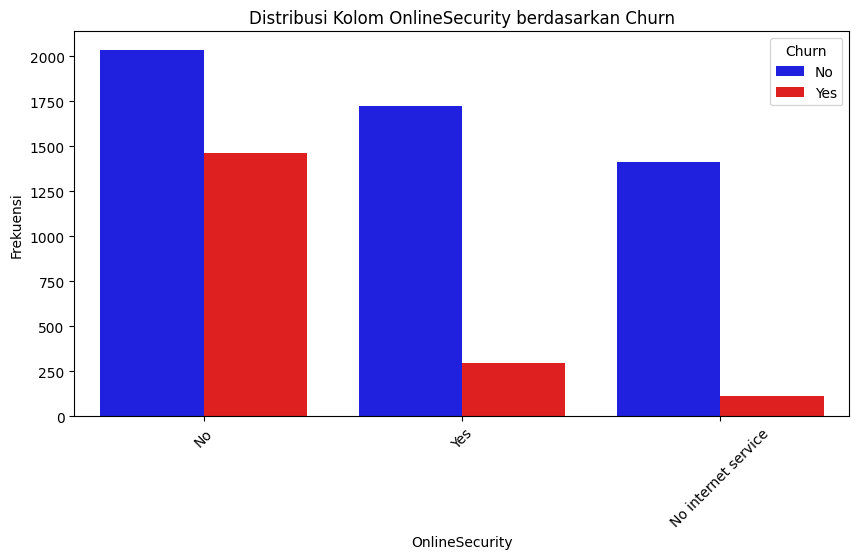

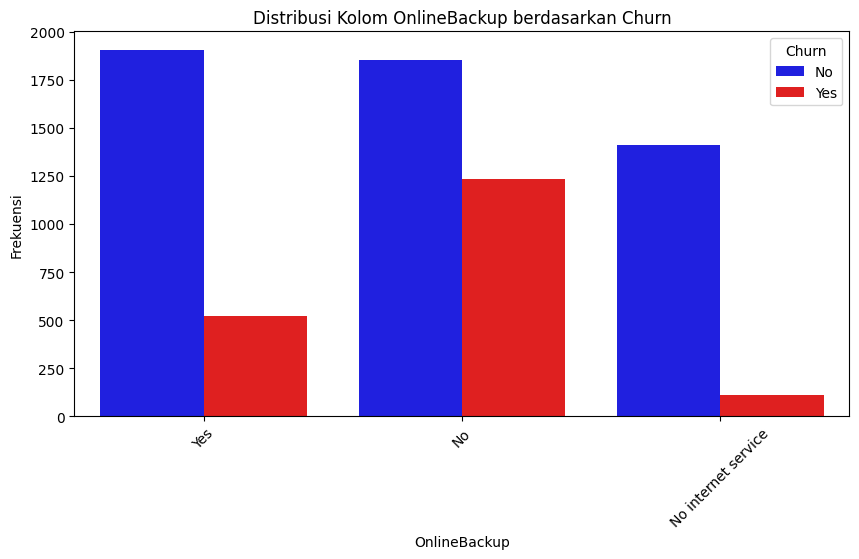

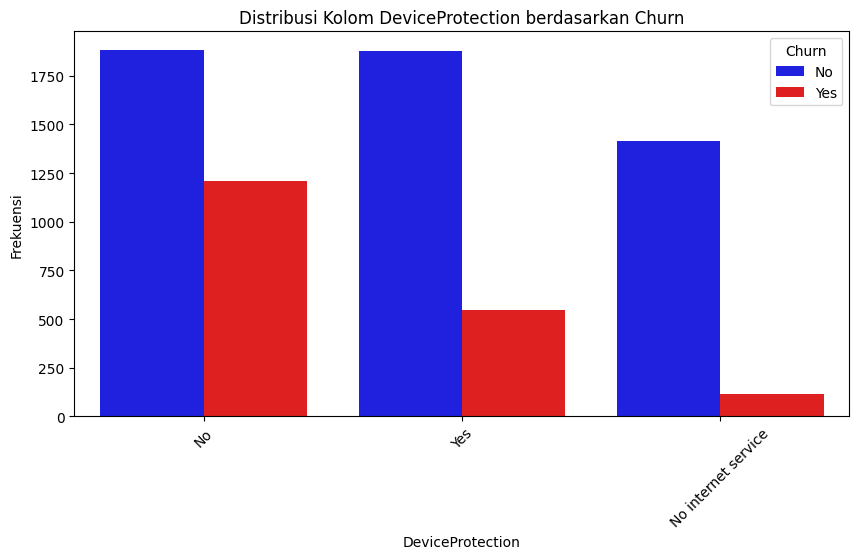

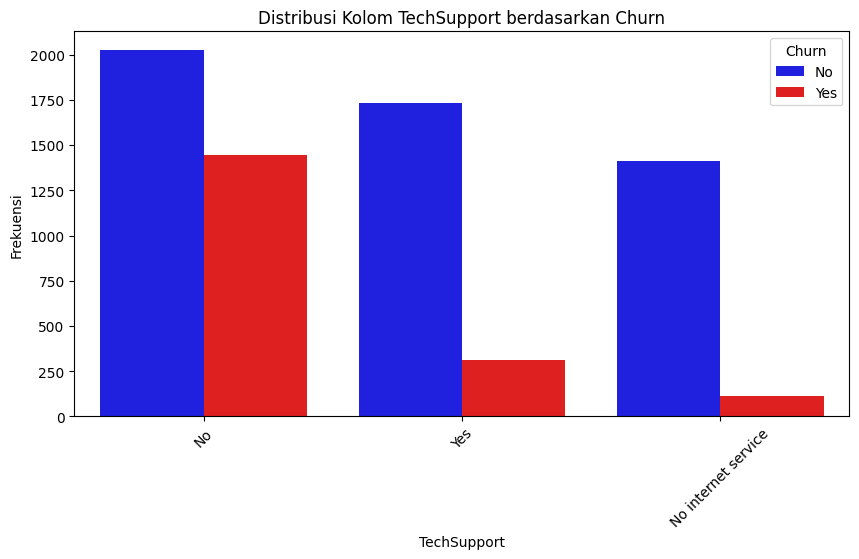

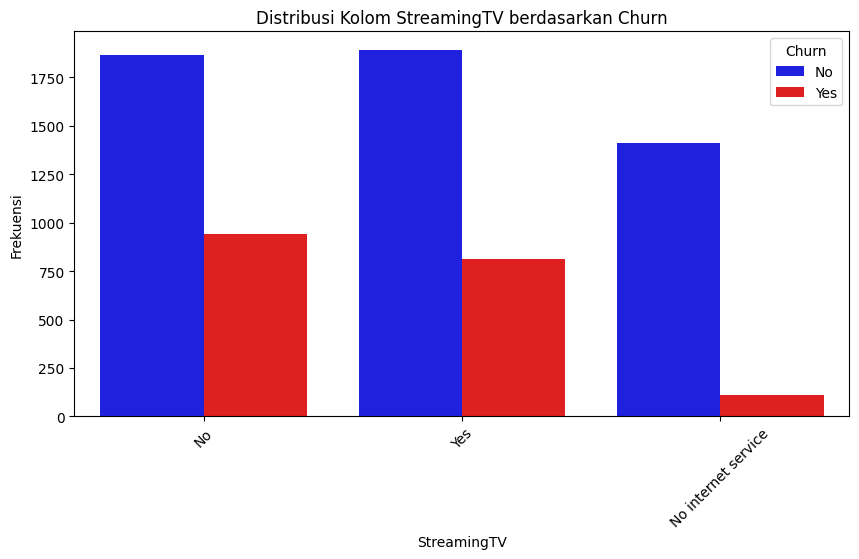

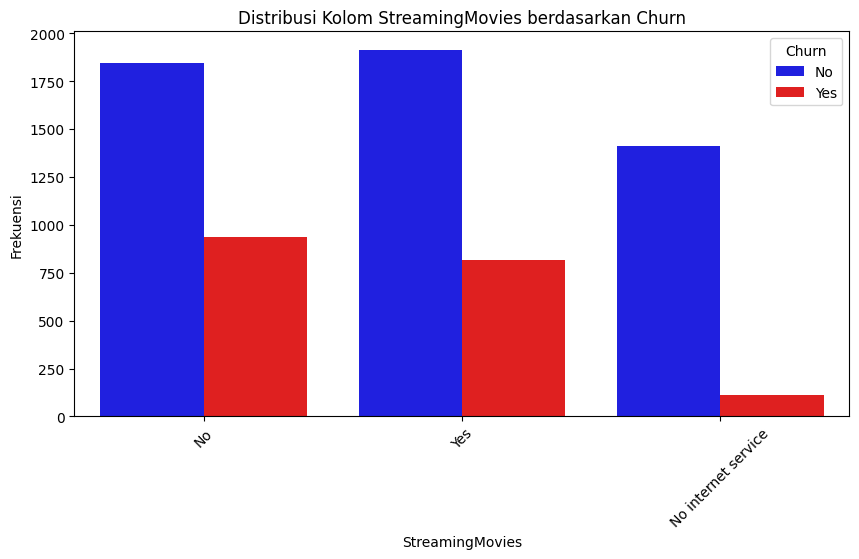

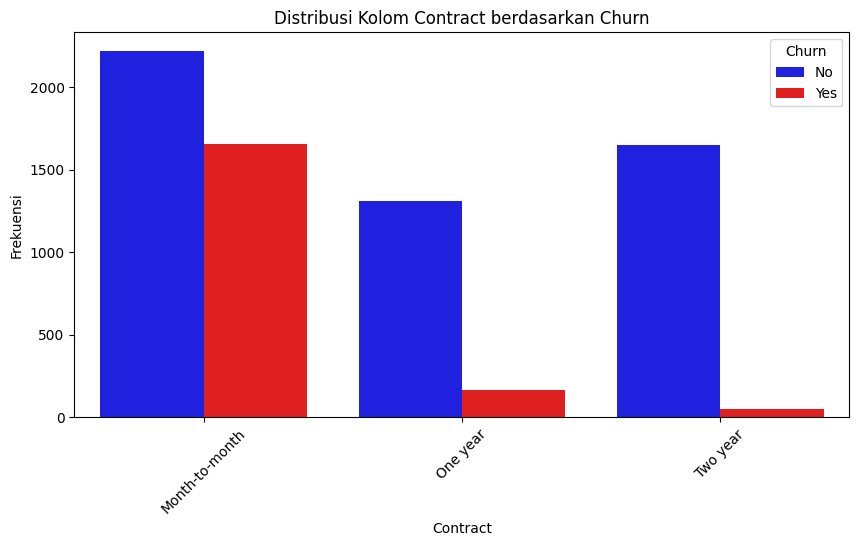

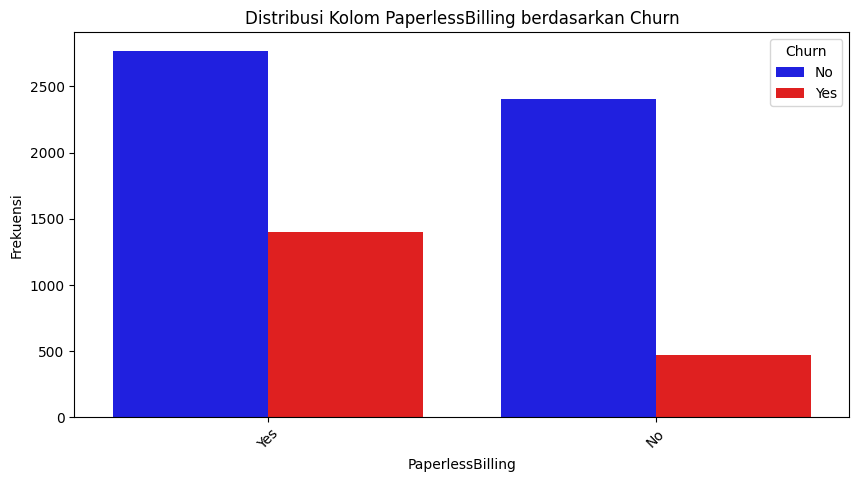

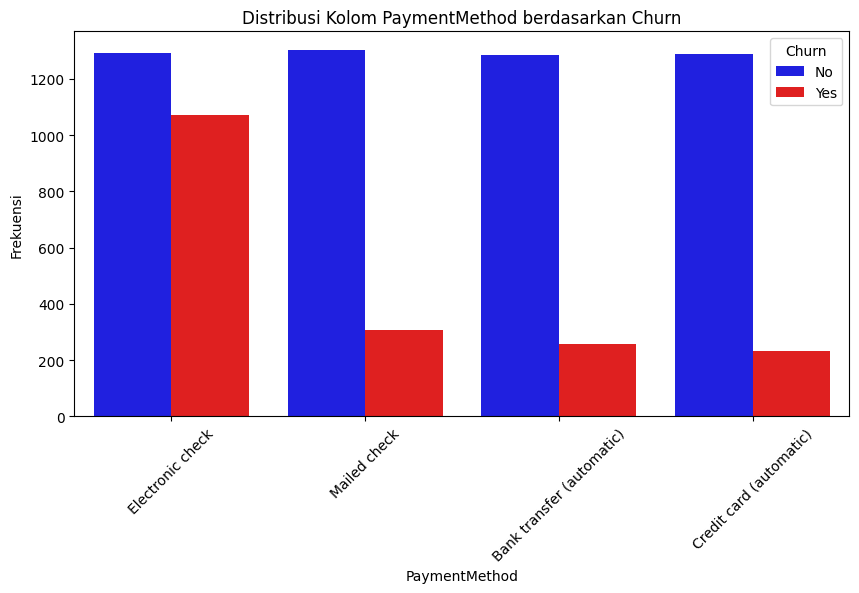

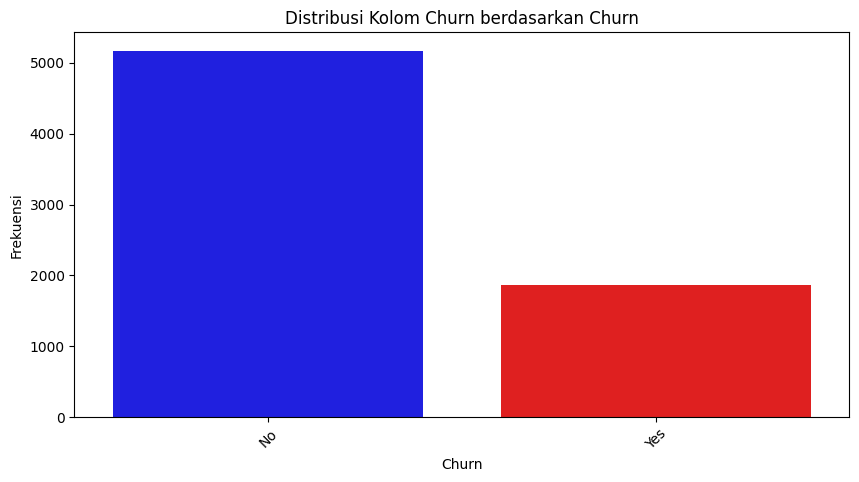

In [16]:
color = ['blue', 'red']
for col in cat_cols.columns:
    if col != 'TotalCharges':
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_copy, x=col, hue='Churn', palette=color)
        plt.title(f'Distribusi Kolom {col} berdasarkan Churn')
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

**Kesimpulan** :
- Customer yang tidak menggunakan layanan tambahan seperti **OnlineSecurity, OnlineBackup, dll** akan lebih sering churn karena :
    - Mereka hanya menggunakan layanan tunggal sehingga **tidak ada ikatan atau ketertarikan** kepada layanan yang lainnya
    - Akan lebih mudah untuk **berganti penyedia langganan** jika hanya menggunakan langganan tunggal
- Pada kolom **InternetService**, kebanyakan customer yang churn adalah yang berlangganan jenis layanan internet **fiber optic**. Hal ini kemungkinan disebabkan karena layanan yang diberikan **kurang memuaskan** bagi customer seperti **jaringan internet yang lambat**, dll
- Customer **berlangganan bulanan** kemungkinan akan churn karena kemungkinan mereka **baru tahu** tentang layanan ini dan ingin mencobanya terlebnih dahulu.
- Customer dengan **pembayaran elektronik** khusunya pembayaran dengan **cek elektronik** kebanyakan churn karena mereka bisa dengan **mudah membatalkan** layanan atau ada faktor yang lain seperti sering terjadi **kesalahan** pada saat pembayaran.
- Customer yang **tidak memiliki pasangan atau tanggungan** kemungkinan besar akan churn karena : 
    - Mereka **tidak memerlukan keputusan orang lain** sehingga bisa **memutuskan dengan cepat**
    - Mereka **tidak memiliki pengeluaran yang banyak** sehingga mereka bisa dengan **mudah berganti penyedia layanan**

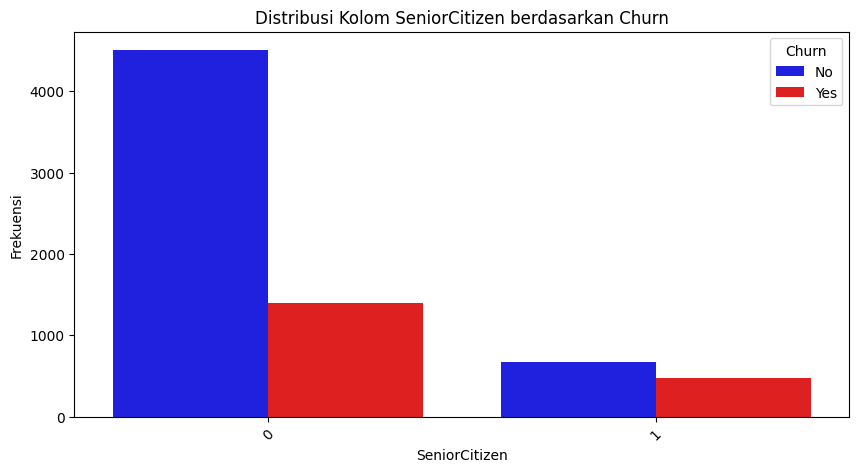

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_copy, x='SeniorCitizen', hue='Churn', palette=color)
plt.title(f'Distribusi Kolom SeniorCitizen berdasarkan Churn')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

**Kesimpulan** :
- Customer yang umurnya tidak lanjut usia kebanyakan churn karena mereka paham dengan teknologi dan bisa membandingkan layanan satu dengan lainnya

Melihat **hubungan** antar kolom numerik

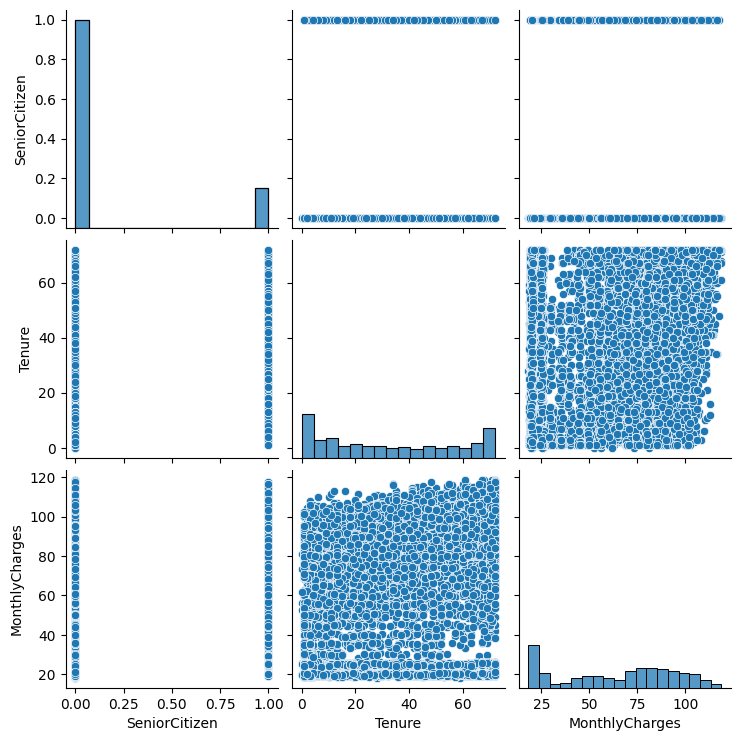

In [18]:
sns.pairplot(num_cols)
plt.show()

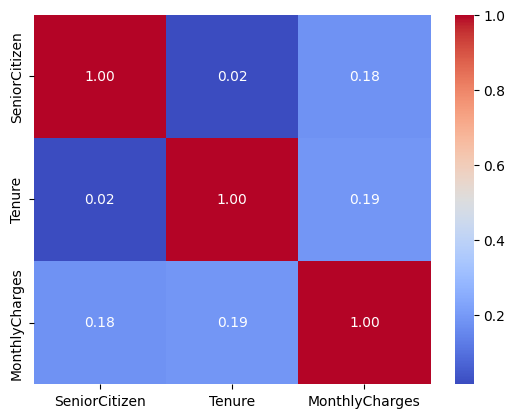

In [19]:
sns.heatmap(num_cols.corr(method='kendall'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

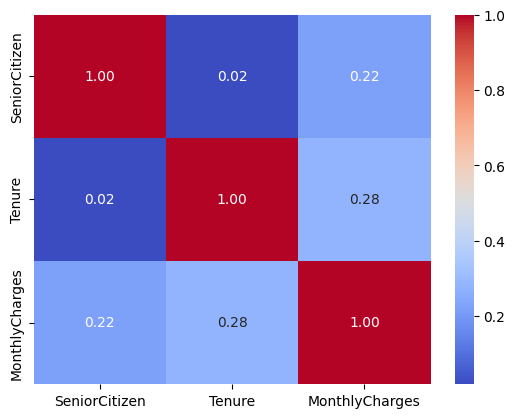

In [20]:
sns.heatmap(num_cols.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Kesimpulan :**
- Korelasi antarkolom numerik **rendah** dan yang paling tinggi itu **0.28**

# **Preprocessing Data**

## **Nilai NaN**

In [21]:
df_copy.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **Data duplikat**

In [22]:
df_copy.duplicated().sum()

np.int64(22)

In [23]:
df_copy[df_copy.duplicated()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


## **Tipe data**

In [24]:
cat_cols.dtypes

Gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [25]:
cat_cols['TotalCharges'] = pd.to_numeric(cat_cols['TotalCharges'], errors='coerce')

In [26]:
cat_cols.dtypes

Gender               object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
TotalCharges        float64
Churn                object
dtype: object

In [27]:
cat_cols.isna().sum()

Gender               0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
TotalCharges        11
Churn                0
dtype: int64

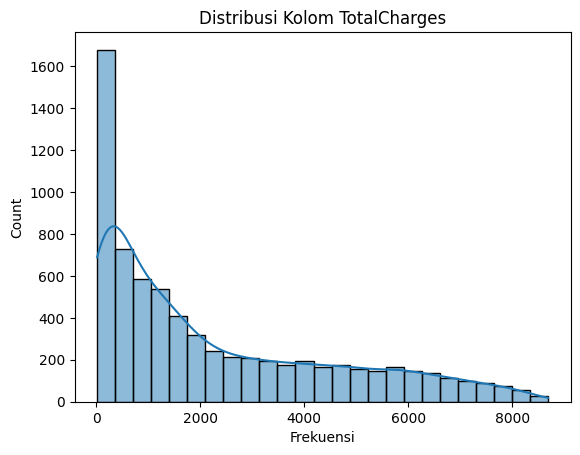

In [28]:
sns.histplot(cat_cols['TotalCharges'], kde=True)
plt.title('Distribusi Kolom TotalCharges')
plt.xlabel('Frekuensi')
plt.show()

In [29]:
cat_cols['TotalCharges'] = cat_cols['TotalCharges'].fillna(cat_cols['TotalCharges'].median())

In [30]:
cat_cols.isna().sum()

Gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

## **Mapping**

In [31]:
mappings = {}
for col in cat_cols.columns:
    if col != 'TotalCharges':
        mappings[col] = {k: i for i, k in enumerate(df[col].unique(), 0)}
        cat_cols[col] = cat_cols[col].map(mappings[col])

In [32]:
mappings

{'Gender': {'Female': 0, 'Male': 1},
 'Partner': {'Yes': 0, 'No': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 2},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'PaymentMethod': {'Electronic check': 0,
  'Mailed check': 1,
  'Bank transfer (automatic)': 2,
  'Credit card (automatic)': 3},
 'Churn': {'No': 0, 'Yes': 1}}

## **Korelasi**

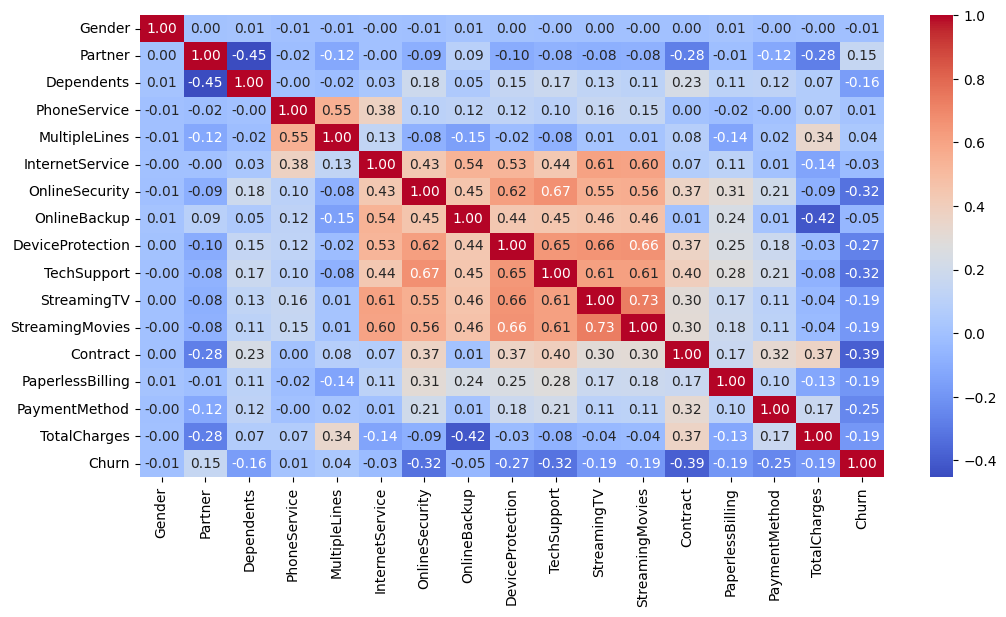

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(cat_cols.corr(method='kendall'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

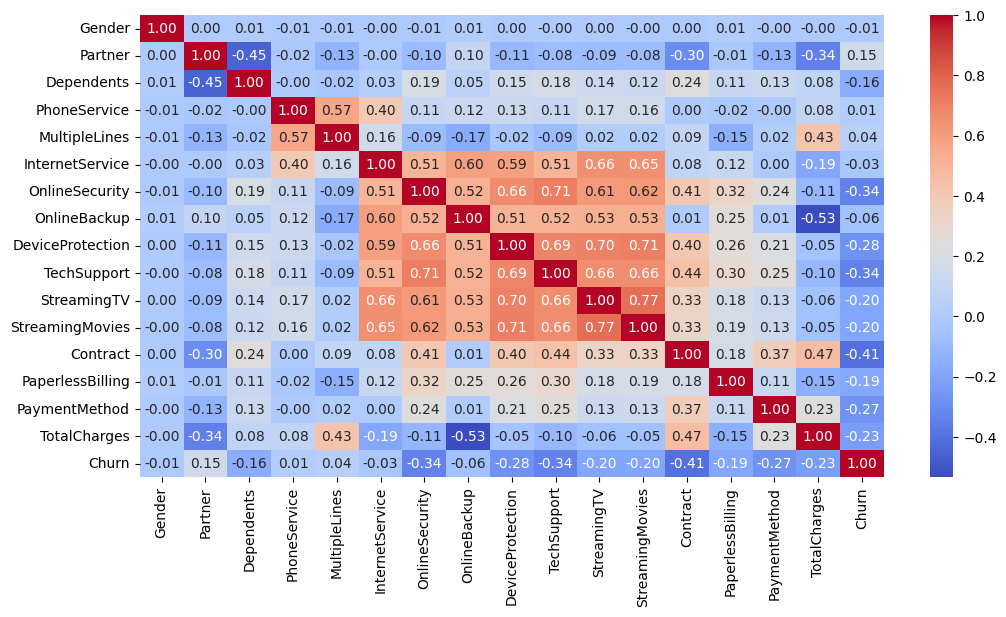

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(cat_cols.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Kesimpulan :**
- Terdapat beberapa korelasi yang **lumayan tinggi** : 0.77 dan 0.71, namun kami masih memberi toleran pada korelasi tersebut karna dibawah 0.85 (threshold umum yang dipakai untuk drop fitur karena multilinearity correlation)

In [35]:
df_copy[num_cols.columns] = num_cols
df_copy[cat_cols.columns] = cat_cols

# **Modelling**

## **Membagi data**

In [36]:
np.random.seed(42)
n_samples = len(df_copy)
indices = np.arange(n_samples)
np.random.shuffle(indices)
test_size = 0.2
split_idx = int(n_samples * (1 - test_size))
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]
x = df_copy.drop(columns=['Churn'])
y = df_copy['Churn']
x_train = x.iloc[train_indices]
x_test = x.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (5634, 19)
x_test shape: (1409, 19)
y_train shape: (5634,)
y_test shape: (1409,)


## **Normalisasi**

In [37]:
class CustomMinMaxScaler:
    def __init__(self):
        self.min_vals = None
        self.max_vals = None
        self.range = None
        
    def fit_transform(self, X):
        # Store min and max values for each feature
        self.min_vals = np.min(X, axis=0)
        self.max_vals = np.max(X, axis=0)
        self.range = self.max_vals - self.min_vals
        
        # Handle zero range (constant features)
        self.range = np.where(self.range == 0, 1, self.range)
        
        # Apply transformation
        return self.transform(X)
    
    def transform(self, X):
        # Apply the same transformation using stored min and max values
        X_scaled = (X - self.min_vals) / self.range
        return X_scaled

# Create custom scaler and apply it
scaler = CustomMinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **Oversampling**

In [38]:
class CustomSMOTE:
    def __init__(self, random_state=None):
        self.random_state = random_state
        
    def fit_resample(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # Convert inputs to numpy arrays if they aren't already
        X_arr = np.array(X)
        y_arr = np.array(y)
        
        # Count class frequencies manually instead of using Counter
        unique_classes = np.unique(y_arr)
        class_counts = {}
        for cls in unique_classes:
            class_counts[cls] = np.sum(y_arr == cls)
        
        # Find majority class
        majority_class = None
        majority_count = -1
        for cls, count in class_counts.items():
            if count > majority_count:
                majority_count = count
                majority_class = cls
        
        # Initialize arrays to hold oversampled data
        X_oversampled = X_arr.copy()
        y_oversampled = y_arr.copy()
        
        # For each class that isn't the majority class
        for class_label in class_counts:
            if class_label != majority_class:
                # Get samples of this class
                class_indices = np.where(y_arr == class_label)[0]
                class_samples = X_arr[class_indices]
                
                # Determine how many synthetic samples to generate
                n_to_generate = majority_count - class_counts[class_label]
                
                # Generate synthetic samples
                for _ in range(n_to_generate):
                    # Randomly select a sample from this class
                    idx = np.random.randint(len(class_samples))
                    
                    # Find 5 nearest neighbors
                    distances = np.sqrt(np.sum((class_samples - class_samples[idx])**2, axis=1))
                    distances[idx] = np.inf  # Exclude self
                    
                    # Get k nearest neighbors
                    k = min(5, len(class_samples) - 1)
                    neighbor_indices = np.argsort(distances)[:k]
                    
                    # Select one of the neighbors randomly
                    neighbor_idx = np.random.choice(neighbor_indices)
                    
                    # Create synthetic sample by interpolation
                    gap = np.random.random()
                    synthetic_sample = class_samples[idx] + gap * (class_samples[neighbor_idx] - class_samples[idx])
                    
                    # Add synthetic sample to dataset
                    X_oversampled = np.vstack([X_oversampled, synthetic_sample])
                    y_oversampled = np.append(y_oversampled, class_label)
        
        return X_oversampled, y_oversampled

# Create custom SMOTE and apply it
smote = CustomSMOTE(random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train_scaled, y_train)

print(f'x_train_oversampled shape: {x_train_oversampled.shape}')
print(f'y_train_oversampled shape: {y_train_oversampled.shape}')

x_train_oversampled shape: (8244, 19)
y_train_oversampled shape: (8244,)


## **Decision Tree**

In [39]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx      
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None, criterion='entropy', random_state=None):
        self.max_depth = max_depth
        self.criterion = criterion
        self.random_state = random_state
        self.root = None
        self.n_classes = None
        self.feature_importances_ = None
        
    def fit(self, X, y):
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # Get unique classes
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        self.feature_importances_ = np.zeros(self.n_features)
        
        # Start building the tree
        self.root = self._grow_tree(X, y, depth=0)
        
        # Normalize feature importances
        if np.sum(self.feature_importances_) > 0:
            self.feature_importances_ /= np.sum(self.feature_importances_)
            
        return self
    
    def predict(self, X):
        # Convert to numpy array if it's not already
        X = np.array(X)
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Stopping criteria
        if (depth >= self.max_depth if self.max_depth else False) or n_classes == 1 or n_samples < 2:
            leaf_value = self._leaf_value(y)
            return Node(value=leaf_value)
        
        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)
        
        # If no split improves the criterion
        if best_feature is None:
            leaf_value = self._leaf_value(y)
            return Node(value=leaf_value)
        
        # Update feature importances
        self.feature_importances_[best_feature] += self._node_impurity(y) - (
            self._node_impurity(y[X[:, best_feature] <= best_threshold]) * np.sum(X[:, best_feature] <= best_threshold) / n_samples +
            self._node_impurity(y[X[:, best_feature] > best_threshold]) * np.sum(X[:, best_feature] > best_threshold) / n_samples
        )
        
        # Split the data
        left_idxs = X[:, best_feature] <= best_threshold
        right_idxs = X[:, best_feature] > best_threshold
        
        # Handle the case where the split doesn't actually split the data
        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
            leaf_value = self._leaf_value(y)
            return Node(value=leaf_value)
        
        # Recursively grow left and right subtrees
        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)
        
        return Node(feature_idx=best_feature, threshold=best_threshold, left=left, right=right)
    
    def _entropy(self, y):
        # Calculate entropy
        classes = np.unique(y)
        entropy = 0
        n_samples = len(y)
        for cls in classes:
            p_cls = np.sum(y == cls) / n_samples
            if p_cls > 0:
                entropy -= p_cls * np.log2(p_cls)
        return entropy
    
    def _node_impurity(self, y):
        # Calculate node impurity based on criterion
        if self.criterion == 'entropy':
            return self._entropy(y)
        else:  # Default to gini
            classes = np.unique(y)
            gini = 1
            n_samples = len(y)
            for cls in classes:
                p_cls = np.sum(y == cls) / n_samples
                gini -= p_cls ** 2
            return gini
    
    def _best_split(self, X, y):
        # Find the best feature and threshold for splitting
        n_samples, n_features = X.shape
        
        # Skip if less than 2 samples or all are the same class
        if n_samples <= 1 or len(np.unique(y)) == 1:
            return None, None
        
        best_gain = -np.inf
        best_feature, best_threshold = None, None
        
        for feature_idx in range(n_features):
            # Get unique values for the feature
            thresholds = np.unique(X[:, feature_idx])
            
            # Skip if only one unique value
            if len(thresholds) <= 1:
                continue
            
            # Check mid-points between thresholds as potential split points
            for i in range(len(thresholds) - 1):
                threshold = (thresholds[i] + thresholds[i + 1]) / 2
                
                # Split data
                left_idxs = X[:, feature_idx] <= threshold
                right_idxs = X[:, feature_idx] > threshold
                
                # Skip if one side is empty
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                # Calculate information gain
                current_impurity = self._node_impurity(y)
                left_impurity = self._node_impurity(y[left_idxs])
                right_impurity = self._node_impurity(y[right_idxs])
                
                left_weight = np.sum(left_idxs) / n_samples
                right_weight = np.sum(right_idxs) / n_samples
                
                # Information gain
                info_gain = current_impurity - (left_weight * left_impurity + right_weight * right_impurity)
                
                if info_gain > best_gain:
                    best_gain = info_gain
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _leaf_value(self, y):
        # Return most common class in y as the leaf value
        unique_classes, counts = np.unique(y, return_counts=True)
        return unique_classes[np.argmax(counts)]
    
    def _traverse_tree(self, x, node):
        # Traverse tree to predict class for a single sample
        if node.value is not None:
            return node.value
        
        if x[node.feature_idx] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

In [40]:
dt_model = CustomDecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)

# **Evaluasi**

In [41]:
def custom_accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [42]:
def custom_classification_report(y_true, y_pred):
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    report = "              precision    recall  f1-score   support\n\n"
    
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_support = 0
    
    # Calculate
    for cls in sorted(unique_classes):
        true_positive = np.sum((y_true == cls) & (y_pred == cls))
        false_positive = np.sum((y_true != cls) & (y_pred == cls))
        false_negative = np.sum((y_true == cls) & (y_pred != cls))
        support = np.sum(y_true == cls)
        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        total_precision += precision * support
        total_recall += recall * support
        total_f1 += f1 * support
        total_support += support
        
        report += f"{cls:14} {precision:.2f}      {recall:.2f}     {f1:.2f}      {support}\n"
    
    # Calculate weighted averages
    avg_precision = total_precision / total_support if total_support > 0 else 0
    avg_recall = total_recall / total_support if total_support > 0 else 0
    avg_f1 = total_f1 / total_support if total_support > 0 else 0
    
    report += f"\nweighted avg    {avg_precision:.2f}      {avg_recall:.2f}     {avg_f1:.2f}      {total_support}\n"
    
    return report

In [43]:
accuracy_dt = custom_accuracy_score(y_test, y_pred_dt)
report_dt = custom_classification_report(y_test, y_pred_dt)

In [44]:
print(f'Decision Tree Accuracy: {accuracy_dt * 100 :.2f}')
print(f'Decision Tree Classification Report:\n{report_dt}')

Decision Tree Accuracy: 79.35
Decision Tree Classification Report:
              precision    recall  f1-score   support

             0 0.85      0.88     0.86      1052
             1 0.61      0.53     0.56      357

weighted avg    0.79      0.79     0.79      1409



**Kesimpulan :**
- Customer yang hanya memakai langganan phone service saja kemungkinan besar akan churn
- Kita harus meningkatkan promosi sehingga para customer tertarik untuk membeli layanan yang lainnya dan akan tetap di layanan kami
- Meningkatkan layanan jaringan agar para customer cukup puas dengan layanan kita